In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"venudodda","key":"9a10ad96952ef98e119c6a0becff62c0"}'}

In [2]:
!mkdir ~/.kaggle/

In [3]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           5058        193  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00            991         30  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           1291         34  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [5]:
! kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:04<00:00, 188MB/s]
100% 812M/812M [00:04<00:00, 171MB/s]


In [6]:
!unzip -qq dogs-vs-cats.zip

In [7]:
!unzip -qq train.zip

## 1. Think on the Cats & Dogs illustration. 

## Initial sample sizes should be 1000 for training, 500 for validation, and 500 for testing.

Adding images to the test, validation, and training sets.

In [8]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

Using the convulational Neural Network.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [11]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

As it can be shown that the model may overfit, regularization techniques are used at the DATA PREPROCESSING step.

Here, each image is transformed into a tensor.

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


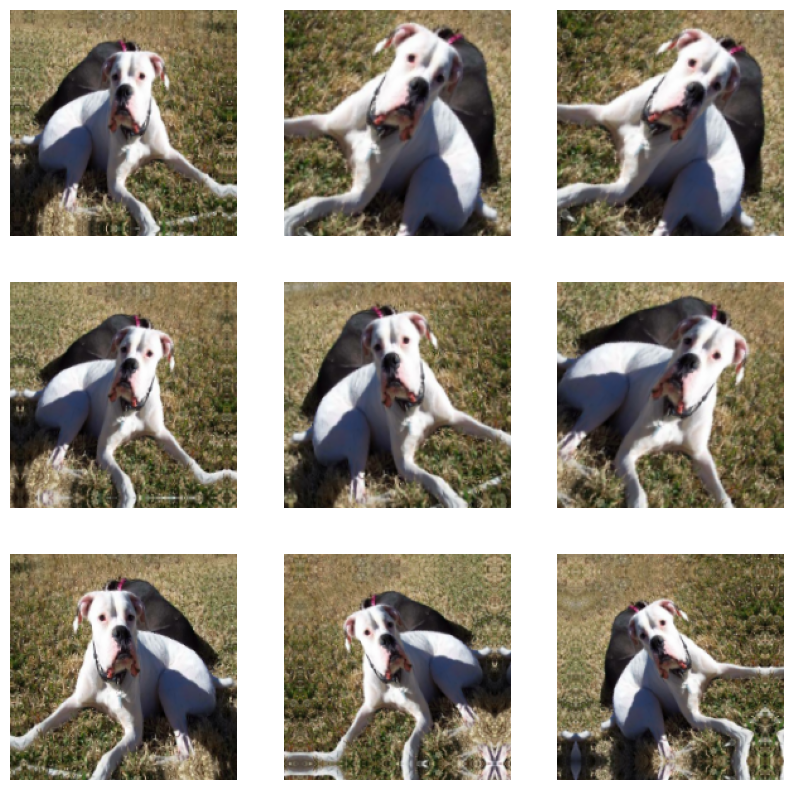

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),])
# Printing enhanced versions of a randomly selected input images
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Callback can be used to end training early if the model is not progressing or to store the model's weights after each epoch. Callbacks may also be used to schedule learning rate adjustments, display model performance, and log metrics.

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 18s 89ms/step - loss: 0.6959 - accuracy: 0.4995 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 4s 63ms/step - loss: 0.6920 - accuracy: 0.5460 - val_loss: 0.6781 - val_accuracy: 0.5800
Epoch 3/10
63/63 [==============================] - 5s 80ms/step - loss: 0.6659 - accuracy: 0.5930 - val_loss: 0.6410 - val_accuracy: 0.6230
Epoch 4/10
63/63 [==============================] - 4s 61ms/step - loss: 0.6194 - accuracy: 0.6660 - val_loss: 0.5830 - val_accuracy: 0.6800
Epoch 5/10
63/63 [==============================] - 4s 63ms/step - loss: 0.5895 - accuracy: 0.6895 - val_loss: 0.5859 - val_accuracy: 0.6750
Epoch 6/10
63/63 [==============================] - 5s 78ms/step - loss: 0.5659 - accuracy: 0.7100 - val_loss: 0.6078 - val_accuracy: 0.6830
Epoch 7/10
63/63 [==============================] - 6s 86ms/step - loss: 0.5163 - accuracy: 0.7355 - val_loss: 0.6307 - val_accuracy: 0.6450
Epoch 8/10
6

It is evident that accuracy grows with the number of epochs.

Accuracy= 81.80%
Val_acc= 73.10%

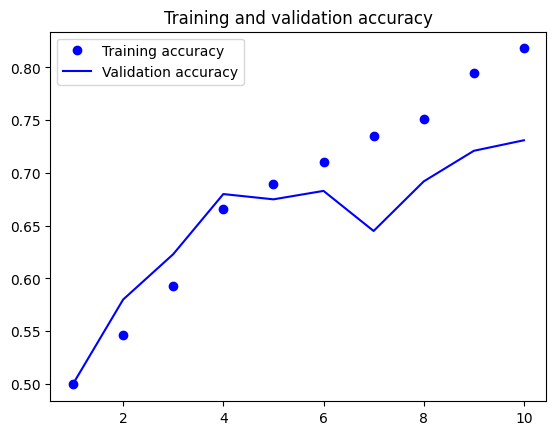

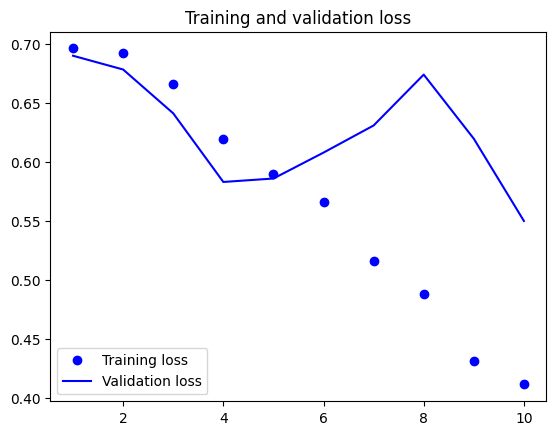

In [15]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [16]:
test_model = keras.models.load_model("convnet_from_scratch1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5798 - accuracy: 0.7340
Test accuracy: 0.734


Test accuracy with no data augmentation = 73.4%

#Data Augmentation

By producing additional, altered versions of the original data, the approach of "data augmentation" allows one to expand the size of a training set. This reduces overfitting and enhances the model's capacity for generalization.

In [17]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [18]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 7s 68ms/step - loss: 0.6951 - accuracy: 0.5135 - val_loss: 0.6924 - val_accuracy: 0.5790
Epoch 2/10
63/63 [==============================] - 5s 79ms/step - loss: 0.6937 - accuracy: 0.4955 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 4s 63ms/step - loss: 0.6929 - accuracy: 0.5320 - val_loss: 0.6802 - val_accuracy: 0.5760
Epoch 4/10
63/63 [==============================] - 6s 86ms/step - loss: 0.6863 - accuracy: 0.5640 - val_loss: 0.6631 - val_accuracy: 0.6050
Epoch 5/10
63/63 [==============================] - 4s 65ms/step - loss: 0.6651 - accuracy: 0.6205 - val_loss: 0.6273 - val_accuracy: 0.6550
Epoch 6/10
63/63 [==============================] - 6s 89ms/step - loss: 0.6544 - accuracy: 0.6235 - val_loss: 0.6263 - val_accuracy: 0.6520
Epoch 7/10
63/63 [==============================] - 6s 99ms/step - loss: 0.6366 - accuracy: 0.6400 - val_loss: 0.7359 - val_accuracy: 0.5950
Epoch 8/10
63

The model's use of data augmentation did not produce any improved outcomes, but this may still be verified by enlarging the training sample size and experimenting with data augmentation on it.

Accuracy= 66.50%
Val_acc= 70.40%


In [20]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.6010 - accuracy: 0.6940
Test accuracy: 0.694


test accuracy was not improved

# 2. Increasing the training sample size.

The size of the training sample was increased from 1000 to 1500.

In [21]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [22]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [23]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [24]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 9s 68ms/step - loss: 0.7012 - accuracy: 0.5110 - val_loss: 0.6911 - val_accuracy: 0.5120
Epoch 2/10
94/94 [==============================] - 7s 67ms/step - loss: 0.6860 - accuracy: 0.5667 - val_loss: 0.6591 - val_accuracy: 0.6550
Epoch 3/10
94/94 [==============================] - 6s 57ms/step - loss: 0.6428 - accuracy: 0.6437 - val_loss: 0.6355 - val_accuracy: 0.6320
Epoch 4/10
94/94 [==============================] - 9s 94ms/step - loss: 0.5900 - accuracy: 0.6937 - val_loss: 0.6110 - val_accuracy: 0.6780
Epoch 5/10
94/94 [==============================] - 6s 56ms/step - loss: 0.5661 - accuracy: 0.7077 - val_loss: 0.5798 - val_accuracy: 0.6900
Epoch 6/10
94/94 [==============================] - 6s 60ms/step - loss: 0.5228 - accuracy: 0.7450 - val_loss: 0.5669 - val_accuracy: 0.7270
Epoch 7/10
94/94 [==============================] - 7s 69ms/step - loss: 0.4776 - accuracy: 0.7737 - val_loss: 0.5290 - val_accuracy: 0.7400
Epoch 8/10
94

In [25]:
test_model = keras.models.load_model(
    "convnet_from_scratch2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.4935 - accuracy: 0.7710
Test accuracy: 0.771


Accuracy= 85%
val_acc= 77.10%

## Applying the Data Augmentation.

In [26]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [27]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 10s 71ms/step - loss: 0.6945 - accuracy: 0.5060 - val_loss: 0.6906 - val_accuracy: 0.5030
Epoch 2/10
94/94 [==============================] - 6s 58ms/step - loss: 0.6940 - accuracy: 0.5257 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 3/10
94/94 [==============================] - 7s 70ms/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.7033 - val_accuracy: 0.5220
Epoch 4/10
94/94 [==============================] - 6s 58ms/step - loss: 0.6744 - accuracy: 0.5997 - val_loss: 0.6819 - val_accuracy: 0.6220
Epoch 5/10
94/94 [==============================] - 7s 69ms/step - loss: 0.6765 - accuracy: 0.5893 - val_loss: 0.6690 - val_accuracy: 0.6440
Epoch 6/10
94/94 [==============================] - 6s 57ms/step - loss: 0.6468 - accuracy: 0.6277 - val_loss: 0.6849 - val_accuracy: 0.5920
Epoch 7/10
94/94 [==============================] - 7s 72ms/step - loss: 0.6360 - accuracy: 0.6450 - val_loss: 0.6759 - val_accuracy: 0.6230
Epoch 8/10
9

In [29]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5914 - accuracy: 0.6710
Test accuracy: 0.671


Accuracy= 67.40%
val_acc= 63%


# 3. Determining the best size for the training sample.

We chose 1500, 1000, and 500 as the appropriate sizes for the training, validation, and test sets.

In [30]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [31]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [32]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
     

In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 10s 83ms/step - loss: 0.7064 - accuracy: 0.5113 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/10
94/94 [==============================] - 7s 67ms/step - loss: 0.6938 - accuracy: 0.5360 - val_loss: 0.6662 - val_accuracy: 0.6130
Epoch 3/10
94/94 [==============================] - 8s 77ms/step - loss: 0.6519 - accuracy: 0.6180 - val_loss: 0.6301 - val_accuracy: 0.6495
Epoch 4/10
94/94 [==============================] - 8s 81ms/step - loss: 0.6079 - accuracy: 0.6743 - val_loss: 0.5580 - val_accuracy: 0.7235
Epoch 5/10
94/94 [==============================] - 6s 66ms/step - loss: 0.5657 - accuracy: 0.7180 - val_loss: 0.6550 - val_accuracy: 0.6450
Epoch 6/10
94/94 [==============================] - 7s 68ms/step - loss: 0.5209 - accuracy: 0.7477 - val_loss: 0.5554 - val_accuracy: 0.7335
Epoch 7/10
94/94 [==============================] - 7s 69ms/step - loss: 0.4773 - accuracy: 0.7700 - val_loss: 1.0772 - val_accuracy: 0.6085
Epoch 8/10
9

In [34]:

test_model = keras.models.load_model(
    "convnet_from_scratch3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5881 - accuracy: 0.7380
Test accuracy: 0.738


Accuracy= 85.37%
val_Acc= 73.50%


## Using the Data Augmentation.

In [35]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [36]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [37]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 10s 72ms/step - loss: 0.6950 - accuracy: 0.5050 - val_loss: 0.6896 - val_accuracy: 0.5025
Epoch 2/10
94/94 [==============================] - 8s 83ms/step - loss: 0.6912 - accuracy: 0.5173 - val_loss: 0.6817 - val_accuracy: 0.5610
Epoch 3/10
94/94 [==============================] - 7s 73ms/step - loss: 0.6697 - accuracy: 0.5773 - val_loss: 0.6922 - val_accuracy: 0.5490
Epoch 4/10
94/94 [==============================] - 7s 75ms/step - loss: 0.6548 - accuracy: 0.6220 - val_loss: 0.6672 - val_accuracy: 0.6275
Epoch 5/10
94/94 [==============================] - 10s 103ms/step - loss: 0.6482 - accuracy: 0.6357 - val_loss: 0.6628 - val_accuracy: 0.6180
Epoch 6/10
94/94 [==============================] - 11s 114ms/step - loss: 0.6313 - accuracy: 0.6370 - val_loss: 0.6130 - val_accuracy: 0.6620
Epoch 7/10
94/94 [==============================] - 11s 116ms/step - loss: 0.6154 - accuracy: 0.6683 - val_loss: 0.6732 - val_accuracy: 0.6230
Epoch 

In [38]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")



32/32 [==============================] - 1s 32ms/step - loss: 0.5808 - accuracy: 0.7050
Test accuracy: 0.705


Accuracy= 71.47%
val_acc= 73%

#4. Using a Pre-trained network.

VGG16 is the architecture of this pre-trained network.

Feature extraction - Instantiating the VGG16 convolutional base

In [39]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

Feature extraction - Extracting features and corresponding labels.

In [40]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

train_features.shape

1/1 [==============================] - 1s 1s/step


(3000, 5, 5, 512)

Feature extraction - Defining and training the densely connected classifier.

In [41]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionPT1.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=15,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/15
94/94 [==============================] - 2s 9ms/step - loss: 15.3386 - accuracy: 0.9370 - val_loss: 8.3701 - val_accuracy: 0.9445
Epoch 2/15
94/94 [==============================] - 1s 6ms/step - loss: 4.6864 - accuracy: 0.9747 - val_loss: 7.2842 - val_accuracy: 0.9590
Epoch 3/15
94/94 [==============================] - 1s 8ms/step - loss: 1.6219 - accuracy: 0.9863 - val_loss: 3.8254 - val_accuracy: 0.9725
Epoch 4/15
94/94 [==============================] - 1s 6ms/step - loss: 1.1346 - accuracy: 0.9887 - val_loss: 6.6303 - val_accuracy: 0.9690
Epoch 5/15
94/94 [==============================] - 1s 7ms/step - loss: 0.7084 - accuracy: 0.9940 - val_loss: 8.3166 - val_accuracy: 0.9650
Epoch 6/15
94/94 [==============================] - 1s 7ms/step - loss: 0.7263 - accuracy: 0.9940 - val_loss: 6.0500 - val_accuracy: 0.9720
Epoch 7/15
94/94 [==============================] - 1s 6ms/step - loss: 0.4886 - accuracy: 0.9960 - val_loss: 4.8232 - val_accuracy: 0.9730
Epoch 8/15
94/94 [=

Accuracy= 99.77%
val_acc= 97.50%

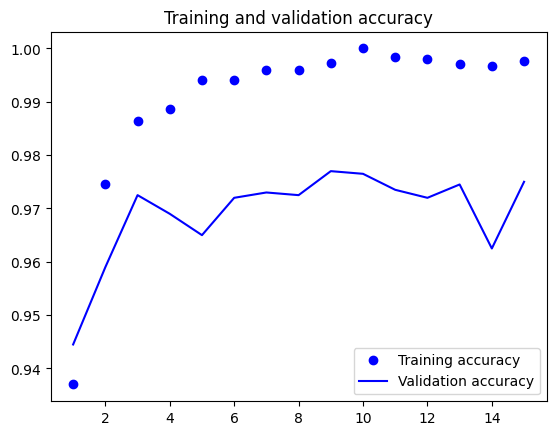

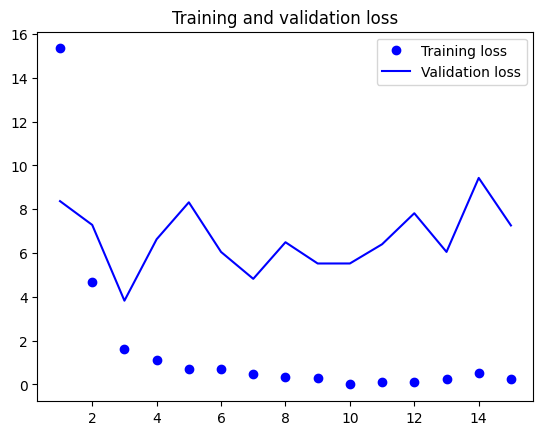

In [42]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [43]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False
     

conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))
     

conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))
     

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


## Feature extraction with the Data Augmentation.

In [44]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [45]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentationPT2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
94/94 [==============================] - 18s 179ms/step - loss: 18.6929 - accuracy: 0.9090 - val_loss: 25.1760 - val_accuracy: 0.8805
Epoch 2/5
94/94 [==============================] - 17s 181ms/step - loss: 6.6362 - accuracy: 0.9410 - val_loss: 5.3602 - val_accuracy: 0.9675
Epoch 3/5
94/94 [==============================] - 17s 174ms/step - loss: 4.3137 - accuracy: 0.9603 - val_loss: 3.0556 - val_accuracy: 0.9760
Epoch 4/5
94/94 [==============================] - 16s 171ms/step - loss: 5.5001 - accuracy: 0.9557 - val_loss: 4.4237 - val_accuracy: 0.9740
Epoch 5/5
94/94 [==============================] - 17s 172ms/step - loss: 3.3421 - accuracy: 0.9697 - val_loss: 3.2661 - val_accuracy: 0.9750


In [46]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentationPT2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 96ms/step - loss: 4.3701 - accuracy: 0.9700
Test accuracy: 0.970


Accuracy= 96.97%
val_Acc= 97.50%


## Summary:

The results show that the models that were regularly trained with data augmentation were unable to outperform those that were trained without it. The accuracy of the model is also enhanced by expanding the training set or modifying the size of the validation set. By contrasting the pre-trained model with and without data augmentation, we can see that the model's accuracy and validation accuracy did not increase as a result of the data augmentation. Pre-trained models often perform better overall than models that are created from scratch, especially when coping with a dearth of training data.